In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
from navtools.dsp import parcorr

In [6]:
# user-defined parameters
SEQUENCE_SIZE = 100
SHIFT = 10
SHIFT2 = 90

# generate two non-return to zero sequences (similar to GNSS prn)
sequence = 2 * np.random.randint(low=0, high=2, size=SEQUENCE_SIZE) - 1
sequence2 = 2 * np.random.randint(low=0, high=2, size=SEQUENCE_SIZE) - 1

# circularly shift sequence to simulate "received" sequence
shifted_sequence = np.roll(a=sequence, shift=SHIFT)
shifted_sequence2 = np.roll(a=sequence2, shift=SHIFT2)

In [7]:
# correlate "received" sequences with baseline sequences to determine user-defined chip shift of "received" sequences
correlation = parcorr(
    sequence=shifted_sequence,
    baseline_sequence=sequence,
    fft=np.fft.fft,
    ifft=np.fft.ifft,
)
correlation2 = parcorr(
    sequence=shifted_sequence2,
    baseline_sequence=sequence2,
    fft=np.fft.fft,
    ifft=np.fft.ifft,
)

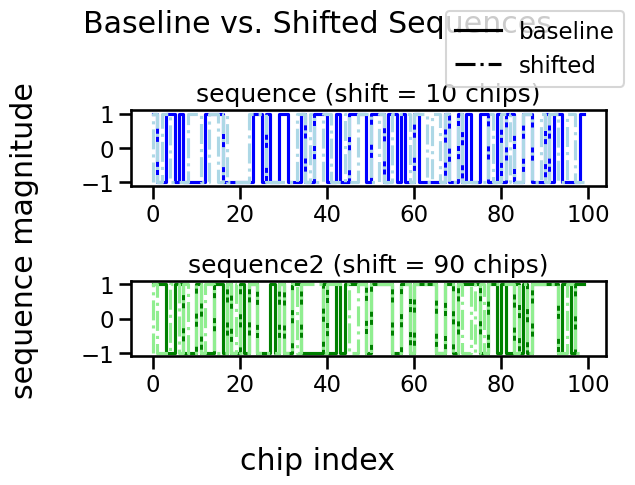

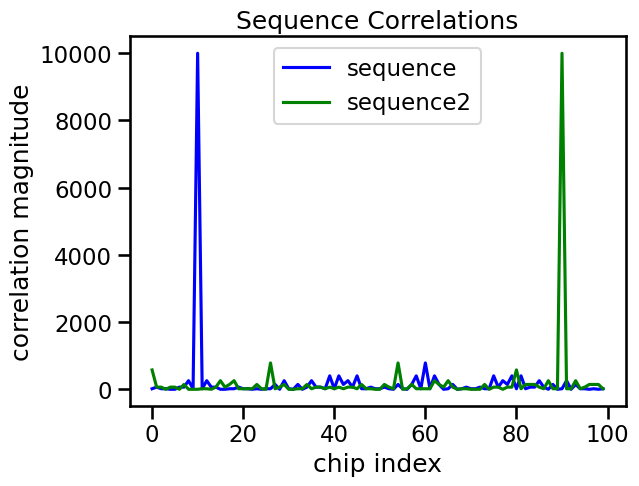

In [8]:
# plot sequences and correlations
sns.set_context("talk")

fig, (ax, ax2) = plt.subplots(2)
fig.suptitle("Baseline vs. Shifted Sequences")
fig.supxlabel("chip index")
fig.supylabel("sequence magnitude")
solid_line = Line2D([0], [0], color="black")
dashdot_line = Line2D([0], [0], linestyle="dashdot", color="black")
fig.legend([solid_line, dashdot_line], ["baseline", "shifted"])

ax.set_title(f"sequence (shift = {SHIFT} chips)")
ax.step(np.arange(0, sequence.size), sequence, color="blue")
ax.step(
    np.arange(0, shifted_sequence.size),
    shifted_sequence,
    color="lightblue",
    linestyle="dashdot",
)

ax2.set_title(f"sequence2 (shift = {SHIFT2} chips)")
ax2.step(np.arange(0, sequence2.size, 1), sequence2, color="green")
ax2.step(
    np.arange(0, shifted_sequence2.size, 1),
    shifted_sequence2,
    color="lightgreen",
    linestyle="dashdot",
)
fig.tight_layout()

fig2, ax = plt.subplots()
ax.set_title("Sequence Correlations")
ax.set_xlabel("chip index")
ax.set_ylabel("correlation magnitude")
ax.plot(correlation, label="sequence", color="blue")
ax.plot(correlation2, label="sequence2", color="green")
ax.legend()
fig.tight_layout()

plt.show()